In [1]:
import pickle

fname = r"C:\Users\Harrison Truscott\Documents\GitHub\cell-tracking\gcp_transfer\Segmentation Analysis\2023.3.24 OptoTiam Exp 50 $tracking_refactor\Analysis Parameters\reading_cells_parameters.pkl"
with open(fname,"rb") as f:
    params = pickle.load(f)

In [2]:
from pathlib import Path
from scipy import ndimage
from skimage.io import imread
from libraries.filter_cells_fns import getcells
cfolder = Path(r"C:\Users\Harrison Truscott\Documents\GitHub\cell-tracking\gcp_transfer\cellmasks\2023.3.24 OptoTiam Exp 50\Cell")
nfolder = Path(r"C:\Users\Harrison Truscott\Documents\GitHub\cell-tracking\gcp_transfer\nucmasks\2023.3.24 OptoTiam Exp 50\Nucleus")
name = "p_s1_t1.TIF"

filename = cfolder/name
filenamenuc = Path("in")/"nuc_in.TIF"
mem = imread(filename);
mem = ndimage.binary_fill_holes(mem);
mem[mem != 0] = 1;
nuc = imread(filenamenuc);
nuc[nuc != 0] = 1;
# params["remove_multi_nuclei_cells"] = False
metrics, labeledmem, labelednuc = getcells(mem,nuc,params,return_metrics=True,centertype="approximate-medoid");

In [3]:
metrics

,label,area,approximate-medoidx,approximate-medoidy,filter code,filter code name
0,1,1491,1260,46,0,valid
1,2,1429,1251,95,0,valid
2,4,1377,106,209,0,valid
3,8,741,1148,271,0,valid
4,10,759,442,419,0,valid
5,16,1080,988,724,0,valid
6,18,2376,1297,856,0,valid
7,19,1574,194,890,0,valid
8,20,1043,341,994,0,valid
9,32771,415,1335,140,8,touching_edge


In [ ]:
from skimage.io import imsave
import numpy as np
outpath = Path("out")/"cells"/(filename.with_suffix(".png").name)
imsave(outpath, labeledmem.view(np.uint16),check_contrast=False);
nucpath = Path("out")/"nucs"/(filename.with_suffix(".png").name)
imsave(nucpath, labelednuc.view(np.uint16),check_contrast=False)

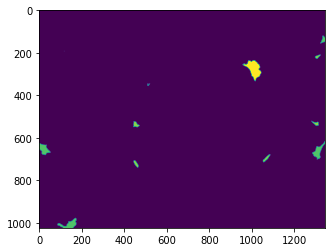

In [23]:
im = imread(outpath)
import matplotlib.pyplot as plt
plt.imshow(im)

In [24]:
im.min()

0

In [25]:
np.unique(im)

array([    0,     1,     2,     4,     8,    10,    16,    18,    19,
          20, 32771, 32781, 32782, 32789, 36869, 36870, 36873, 36875,
       36876, 36879, 36881, 45063], dtype=uint16)

In [30]:
from libraries.filter_cells_fns import CellFilters
codes = CellFilters.get_code(im)
codes[codes==0] = 18
codes[codes==-1] = 0
codes = codes.astype(np.uint8)
imsave(Path("out/coded")/filename.with_suffix(".png").name,codes)
i = imread(Path("out/coded")/filename.with_suffix(".png").name)
print(np.unique(i))
# CellFilters(np.unique(codes))

C:\Windows\Temp\ipykernel_24428\2880635593.py:6: UserWarning: C:\Users\Harrison Truscott\Documents\GitHub\SegmenterProcessing\out\coded\p_s1_t1.png is a low contrast image
  imsave(Path("out/coded")/filename.with_suffix(".png").name,codes)


[ 0  8  9 11 18]


In [35]:
labels = CellFilters.get_label(im)
imsave(Path("out/labels")/filename.with_suffix(".png").name,labels)
np.unique(labels)

C:\Windows\Temp\ipykernel_24428\3799021875.py:2: UserWarning: C:\Users\Harrison Truscott\Documents\GitHub\SegmenterProcessing\out\labels\p_s1_t1.png is a low contrast image
  imsave(Path("out/labels")/filename.with_suffix(".png").name,labels)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=uint16)

In [27]:
[bin(c) for c in np.unique(im)]

['0b0',
 '0b1',
 '0b10',
 '0b100',
 '0b1000',
 '0b1010',
 '0b10000',
 '0b10010',
 '0b10011',
 '0b10100',
 '0b1000000000000011',
 '0b1000000000001101',
 '0b1000000000001110',
 '0b1000000000010101',
 '0b1001000000000101',
 '0b1001000000000110',
 '0b1001000000001001',
 '0b1001000000001011',
 '0b1001000000001100',
 '0b1001000000001111',
 '0b1001000000010001',
 '0b1011000000000111']

In [28]:
print(np.unique(CellFilters.get_label(im)))
print(CellFilters.get_label(np.unique(im)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 0  1  2  4  8 10 16 18 19 20  3 13 14 21  5  6  9 11 12 15 17  7]
